In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


## check if there is any missing or null value

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## add a new column no of year

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
final_dataset['Current_Year']=2023

In [14]:
final_dataset['No_of_Year']=final_dataset['Current_Year']-final_dataset['Year']

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [19]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

## Get dummies to avoiddummy varibale trap

In [21]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


## Correlation

In [23]:
Corr_matrix = final_dataset.corr()
Corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
No_of_Year               -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [24]:
import seaborn as sns

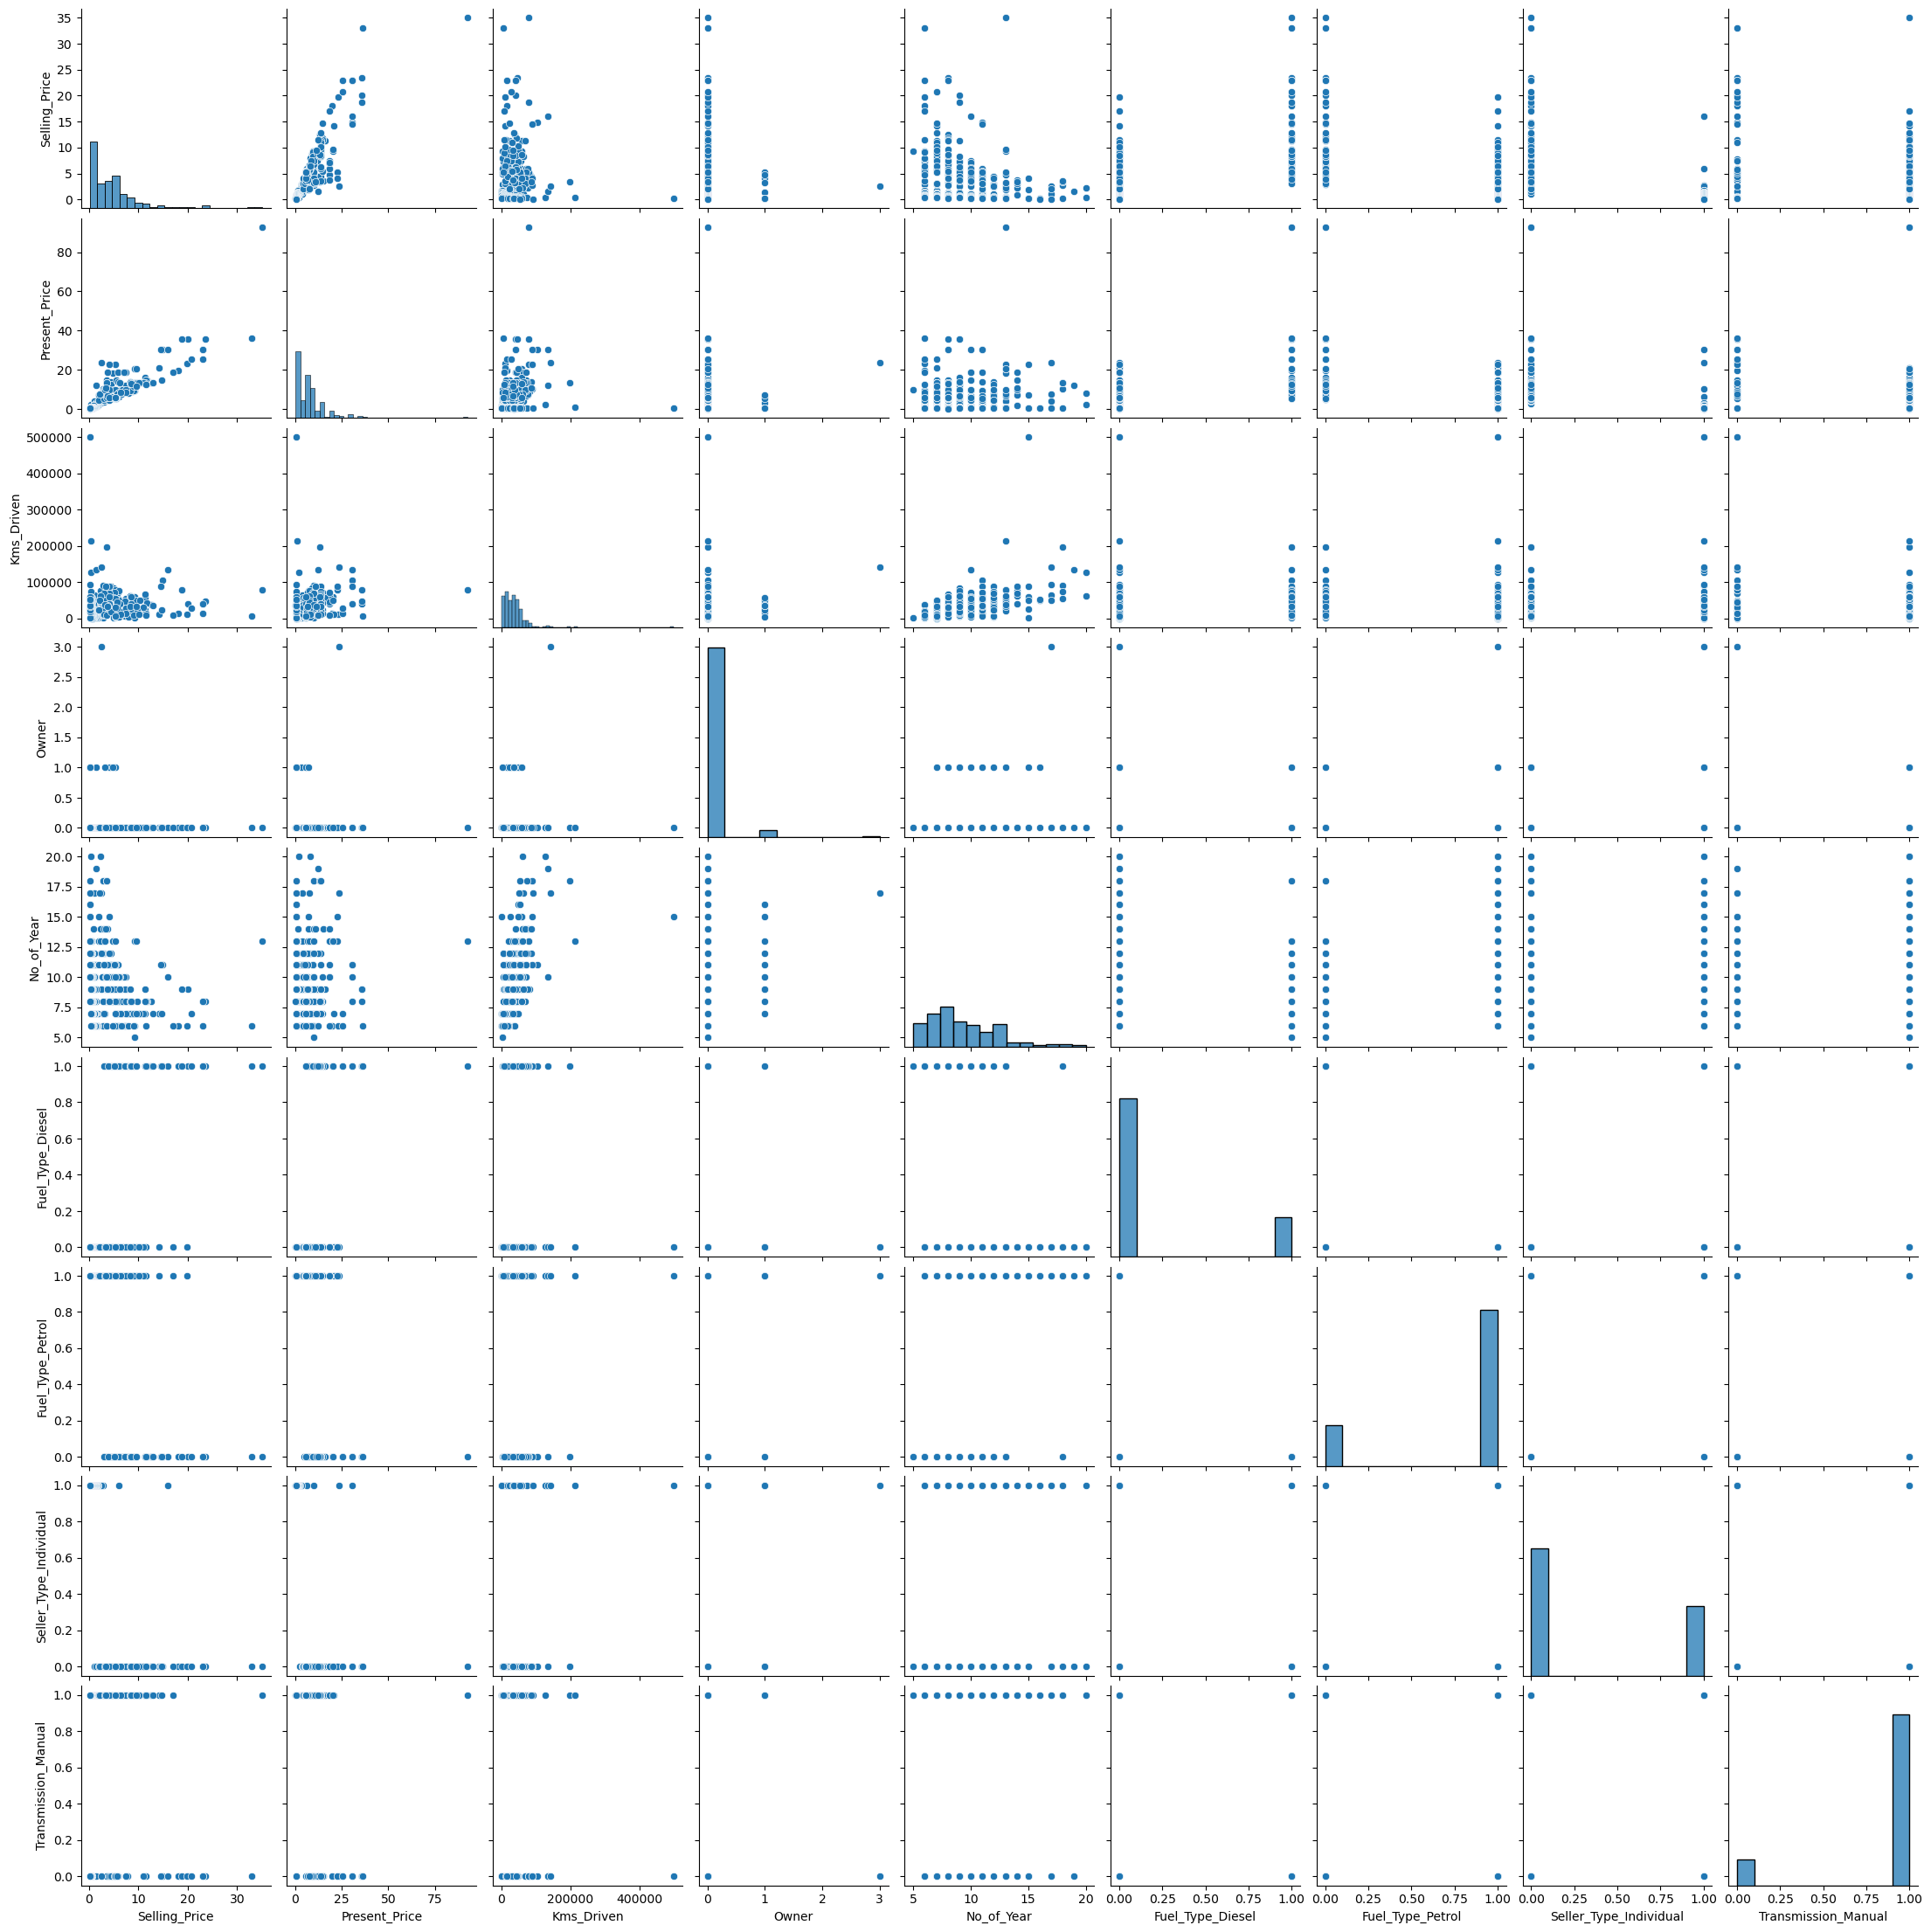

In [25]:
sns.pairplot(final_dataset)

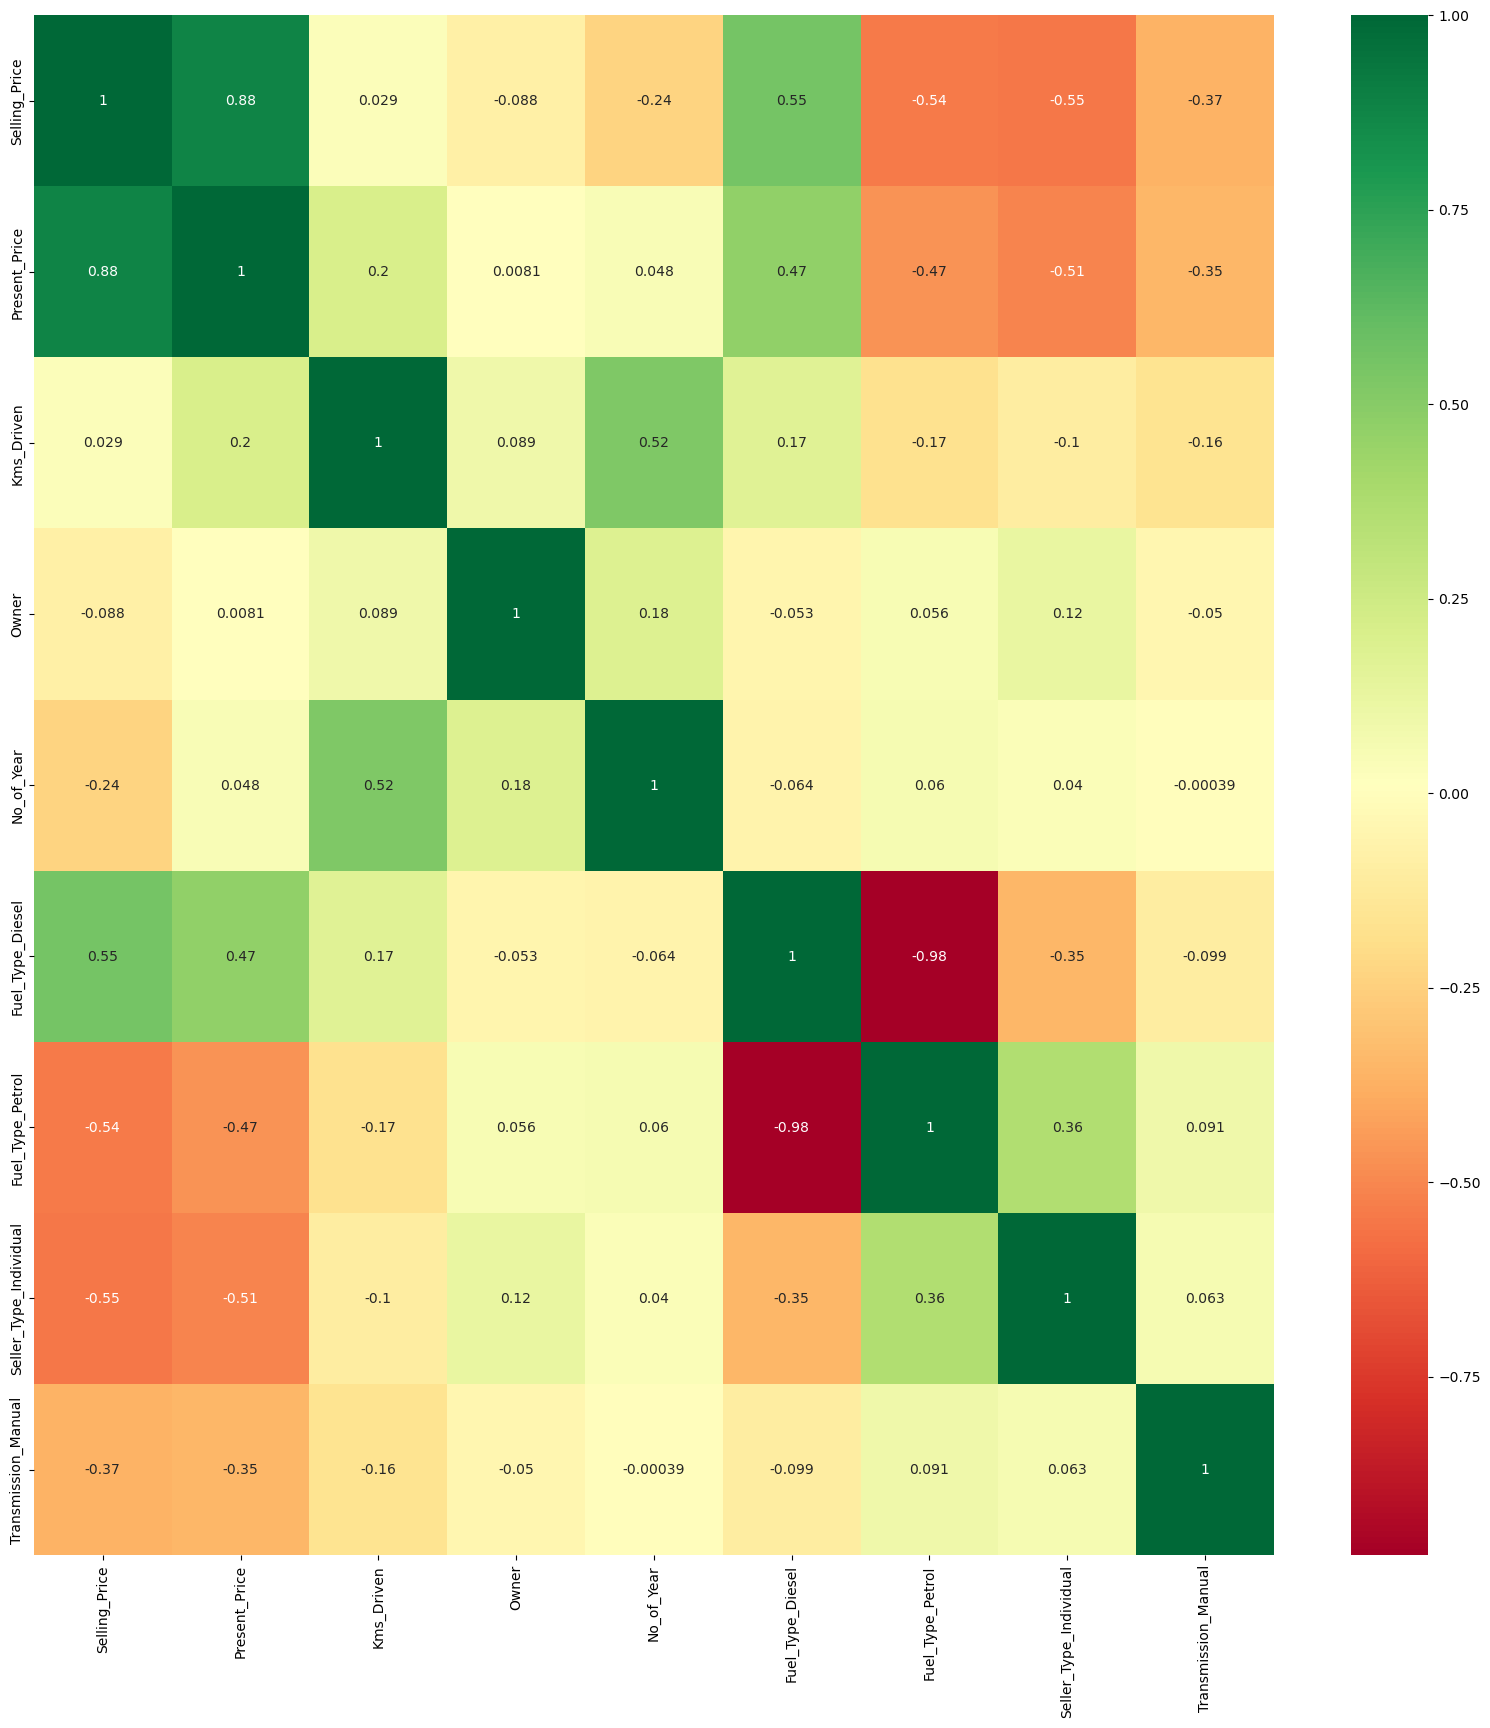

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
top_corr_features = Corr_matrix.index
plt.figure(figsize = (20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [30]:
#independent and dependent features
x_feature = final_dataset.iloc[:,1:]
y_label = final_dataset.iloc[:,0]

## Feature importance(Which features are imp from the dataset)

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x_feature,y_label)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[0.41151867 0.03908314 0.00045382 0.0753224  0.21330038 0.01251705
 0.11583231 0.13197224]


## find the top 5 imp features (optional)

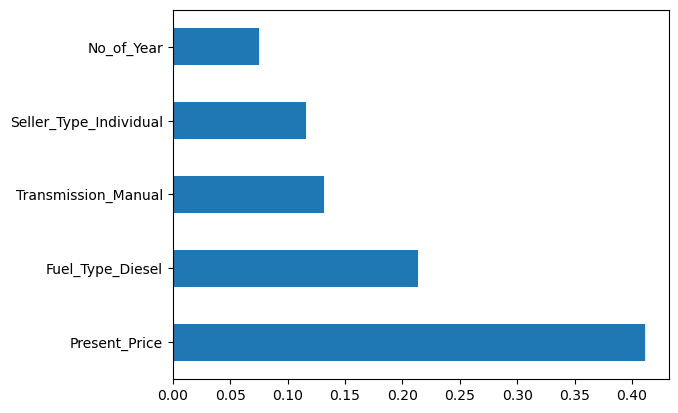

In [36]:
#plot graph of feature importances for better visualization 
# feat_importances = pd.Series(model.feature_importances_, index=x_feature.columns) 
# feat_importances.nlargest(5).plot(kind='barh') 
# plt.show()

## Train test Split from Sklearn

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_feature,y_label,test_size=0.2,random_state=42)

In [42]:
x_test.shape

(61, 8)

## If we are using randomforestregressor then no need to use scaling as it uses decision tree

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

## Hyper parameters tuning

In [44]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


## Randomized searchCV finds and applies the best parameters which can be applied (other option GeneralSearchCV)

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [51]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [52]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\dasbi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dasbi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dasbi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\dasbi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dasbi\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
predictions = rf_random.predict(x_test)

In [55]:
predictions

array([ 0.71823   , 10.19991   ,  5.26935   ,  0.318     ,  6.89604   ,
        6.39595   ,  0.98836   ,  0.60817   ,  0.50422   ,  6.21755   ,
       11.35768   ,  0.88631   ,  7.46353   ,  0.59337   ,  5.4227    ,
        2.99007   ,  0.98807   , 10.94019   ,  0.61787   ,  1.43267   ,
        0.54002   ,  8.69131   ,  5.74501   ,  2.74055   ,  0.54482   ,
        3.54813   ,  5.2561    ,  3.08612   ,  1.1895    ,  1.10359   ,
        0.68988   ,  9.64961   ,  0.43399   ,  2.63637   ,  7.98685   ,
        4.11678   ,  6.1012    ,  4.74172   ,  3.14273   ,  5.2197    ,
        3.88765   ,  4.00939   ,  4.86145   ,  0.55562   ,  6.98559   ,
        0.57328   ,  7.03805   ,  6.25956   ,  3.16519   ,  3.68431667,
        5.40704   ,  1.38788   , 20.67854   , 20.84123   ,  6.80795   ,
        8.59057   ,  5.24454   ,  9.4539    ,  2.6149    ,  7.31982   ,
        0.29755   ])

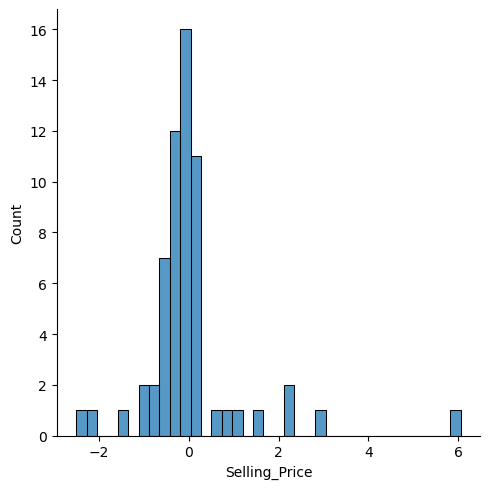

In [59]:
sns.displot(y_test-predictions)

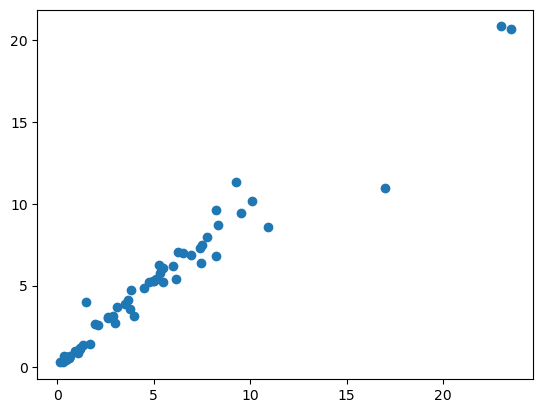

In [57]:
plt.scatter(y_test,predictions)

In [60]:
from sklearn import metrics

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

MAE: 0.6068596174863372
MSE: 1.2837697895597446
RMSE: 1.133035652378046


In [65]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [66]:
print_scores(rmse)

Scores: 1.133035652378046
Mean: 1.133035652378046
Standard deviation: 0.0


In [67]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

## now create requirement.txt